In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
yield_data = pd.read_csv("yield_df.csv")

In [5]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   label                          28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
yield_data = yield_data.drop(['label'],axis=1)

In [7]:
yield_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
yield_data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [9]:
yield_data = yield_data.rename(columns={'hg/ha_yield':'Yield'})

In [10]:
yield_data = yield_data.rename(columns={'avg_temp':'Temperature'})

In [11]:
yield_data = yield_data.rename(columns={'pesticides_tonnes':'Pesticides'})

In [12]:
yield_data = yield_data.rename(columns={'average_rain_fall_mm_per_year':'Rainfall'})

In [13]:
yield_data.head()

,Area,Item,Year,Yield,Rainfall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [14]:
yield_d = pd.get_dummies(yield_data, columns=['Area','Item'], prefix = ['Area','Item'])
final_data=yield_d.loc[:, yield_d.columns != 'Yield']
label=yield_data['Yield']
final_data.head()

,Year,Rainfall,Pesticides,Temperature,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Year', ylabel='Yield'>

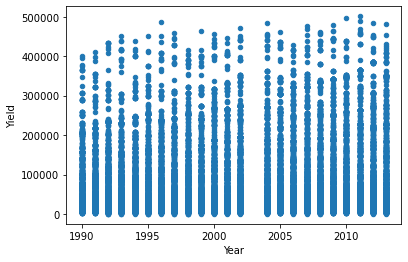

In [15]:
yield_data.plot(kind="scatter", x="Year", y="Yield", alpha=1)

<AxesSubplot:xlabel='Item', ylabel='Yield'>

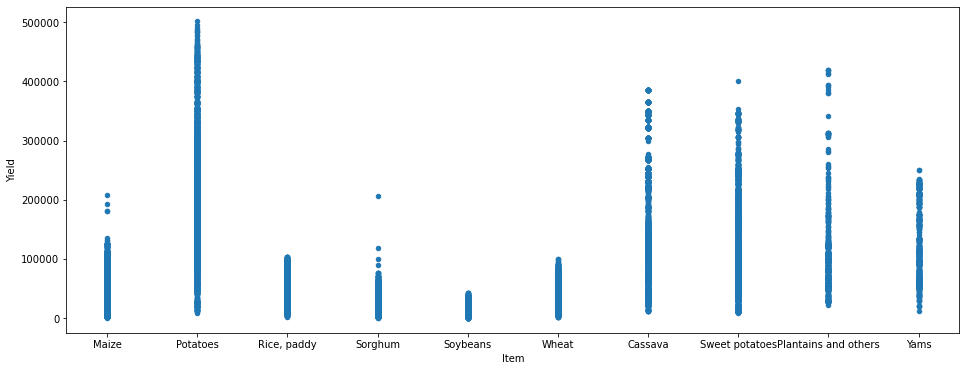

In [16]:
yield_data.plot(figsize=(16,6),x='Item',y='Yield',kind="scatter")

<AxesSubplot:xlabel='Rainfall', ylabel='Yield'>

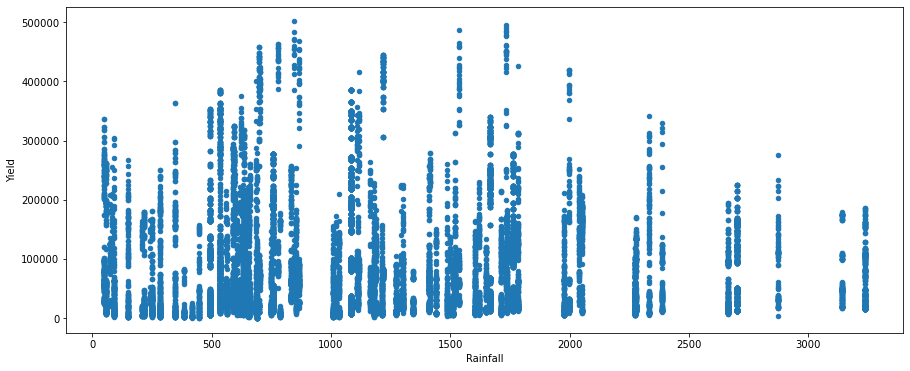

In [17]:
yield_data.plot(kind="scatter", x="Rainfall", y="Yield", alpha=1, figsize=(15,6))

<AxesSubplot:xlabel='Pesticides', ylabel='Yield'>

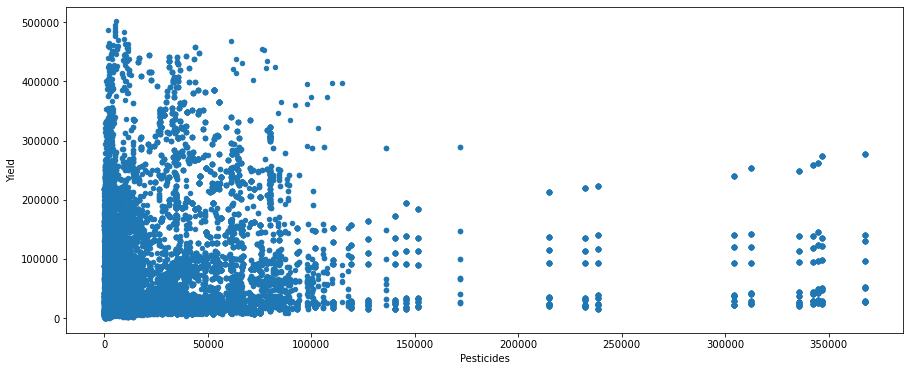

In [18]:
yield_data.plot(kind="scatter", x="Pesticides", y="Yield", alpha=1, figsize=(15,6))

In [19]:
new_correlation = yield_data.corr()

<AxesSubplot:>

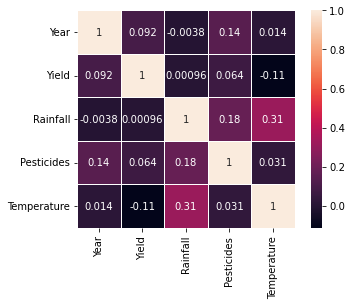

In [20]:
sns.heatmap(new_correlation, annot=True, square=True, linewidths=1)

In [21]:
final_data.head()

,Year,Rainfall,Pesticides,Temperature,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
year = yield_data['Year']
yield_data = yield_data.drop(['Year'],axis=1)

## Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_data = scaler.fit_transform(final_data)

In [24]:
s_data

array([[0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s_data, label, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

## Choosing a proper model



In [27]:
model_1 = GradientBoostingRegressor(n_estimators=200, random_state=42)

In [28]:
model_1.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error
pred_1 = model_1.predict(x_train)
mse = mean_squared_error(y_train, pred_1)
rmse = np.sqrt(mse)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_train, pred_1)

0.9079037438842649

In [32]:
model_2 = DecisionTreeRegressor(max_depth=10)

In [33]:
model_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [34]:
pred_2 = model_2.predict(x_train)
r2_score(y_train,pred_2)

0.942324523332976

In [35]:
train_losses = []
val_losses = []

In [36]:
train_loss = mean_squared_error(y_train, pred_2)

In [37]:
train_loss

415741787.71032214

# grid search to find optimal depth

from sklearn.model_selection import GridSearchCV

#Define the grid of hyperparameters to search over
param_grid = {'max_depth': np.arange(1, 11)}

#Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='r2')

#Fit the grid search object to the data
grid_search.fit(x_train, y_train)

#Print the best value of max_depth and the corresponding R2 score
print("Best value of max_depth:", grid_search.best_params_['max_depth'])
print("Best R2 score:", grid_search.best_score_)

In [52]:
from sklearn.neural_network import MLPRegressor
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam',
                    alpha=0.0001, learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, shuffle=True,
                    random_state=0)

In [53]:
model_mlp.fit(x_train, y_train)

C:\Users\mohit\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state=0)

In [54]:
pred_mlp = model_mlp.predict(x_train)

In [55]:
r2_score(y_train, pred_mlp)

0.9870723617875438

In [56]:
from joblib import dump, load

In [57]:
dump(model_mlp,'MLP.joblib')

['MLP.joblib']

# Testing our model

In [58]:
test_pred = model_mlp.predict(x_test)

In [59]:
r2_score(y_test, test_pred)

0.9826152034292865

As testes above, MLPregressor was the most optimum model for our dataset and it is also doing well for our test dataset

Out of Gradient Boosting Regressor, Decision Tree and Multi_Layer Perceptron Regressor
##### MLPRegressor is performing best.